# Energy consumption of single household with yearly seasonality

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
full_data = pd.read_csv("../../data/synthetic/time_series_single_household.csv")
print(len(full_data))

1442


In [14]:
full_data.head(10)

,Index,Time,Energy
0,0,16/12/2006,2.487728
1,1,17/12/2006,1.619929
2,2,18/12/2006,1.313087
3,3,19/12/2006,1.207975
4,4,20/12/2006,1.581628
5,5,21/12/2006,1.169972
6,6,22/12/2006,2.996203
7,7,23/12/2006,2.798056
8,8,24/12/2006,1.318883
9,9,25/12/2006,2.811164


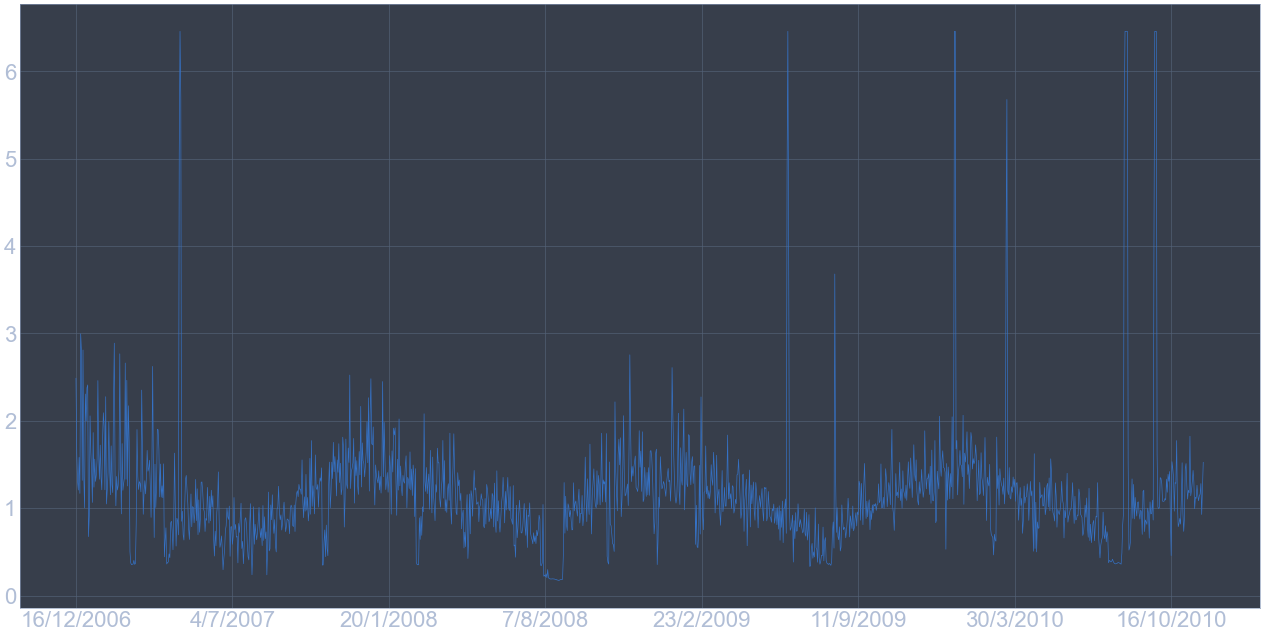

In [56]:
plt.figure(figsize=(40,20), dpi=40)
plt.locator_params(axis='x', nbins=3)
x_ticks = np.arange(0, len(full_data["Time"]), 200)
plt.xticks(x_ticks)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.plot(full_data["Time"],full_data["Energy"])
plt.show()

## Outliers treatment

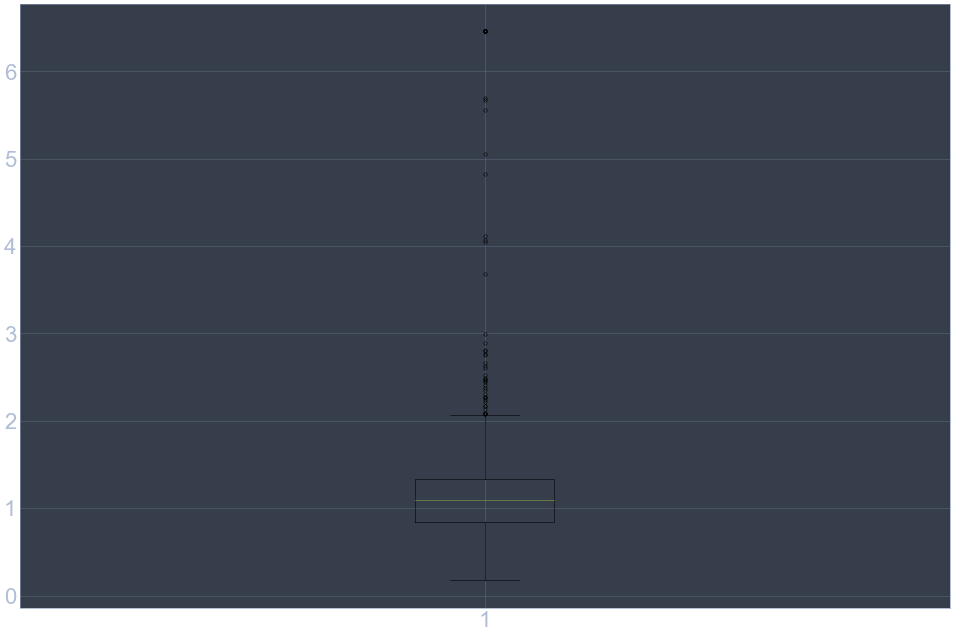

In [62]:
# Find better colors to visualize the boxplot
plt.figure(figsize=(30,20), dpi=40)
plt.boxplot(full_data['Energy'])
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.show()

In [94]:
# we have potentially 8 outliers, but clearly at least seven should be consider as outlier
max_value = 4.0
outliers_number = (full_data["Energy"] > max_value).sum()
# The condition returns a boolean array and the sum() call adds only the true conditions
outliers_density = outliers_number/len(full_data["Energy"])
print(f"The number of outliers is {outliers_number} and the outliers density is: {outliers_density}")

The number of outliers is 19 and the outliers density is: 0.013176144244105409


## Spliting the data

In [96]:
from sklearn.model_selection import train_test_split

In [99]:
train_size_percentage = 0.8
X = full_data.drop(columns=['Index',"Energy"]).copy()
y = full_data["Energy"]
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=train_size_percentage)

In [101]:
print(len(X_train))

1153
